# House Prices - Regressão com Visualizações e Explicações


In [51]:
# ## 1. Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [29]:
# Configuração dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [33]:
# ## 2. Carregamento dos dados
df = pd.read_csv("train.csv")
print("Formato do dataset:", df.shape)
df.head()

Formato do dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
# ## 3. Análise exploratória (EDA)
print("Informações gerais:")
df.info()

print("\nValores ausentes:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\nEstatísticas descritivas:")
df.describe()


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


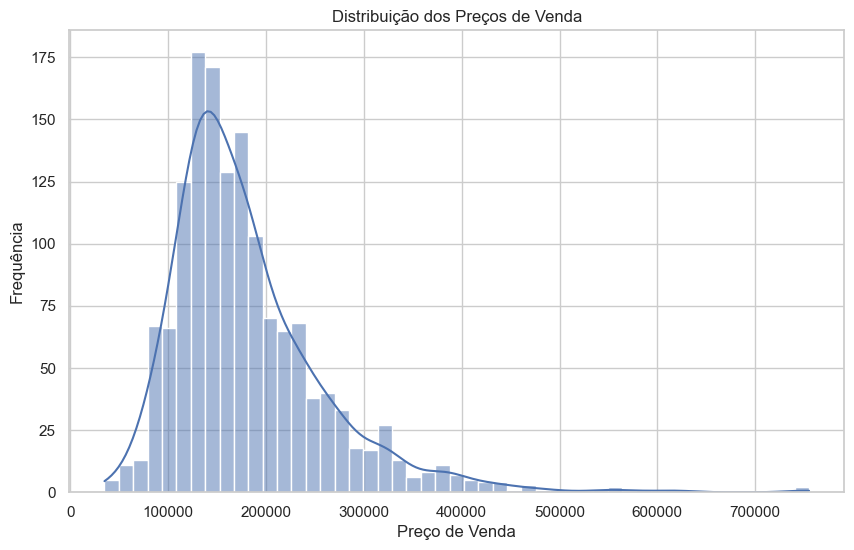

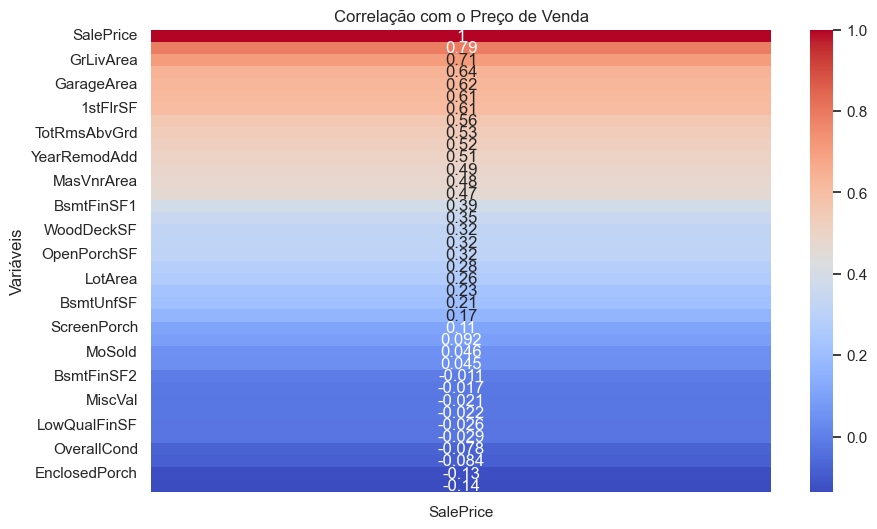

In [37]:
# ### 3.1 Visualizações gerais
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribuição dos Preços de Venda")
plt.xlabel("Preço de Venda")
plt.ylabel("Frequência")
plt.show()

corr = df.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlação com o Preço de Venda")
plt.ylabel("Variáveis")
plt.show()

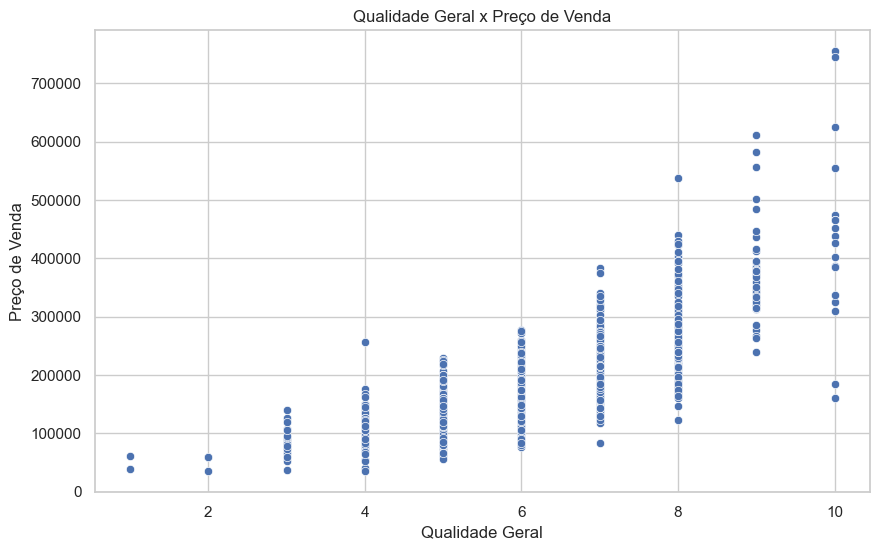

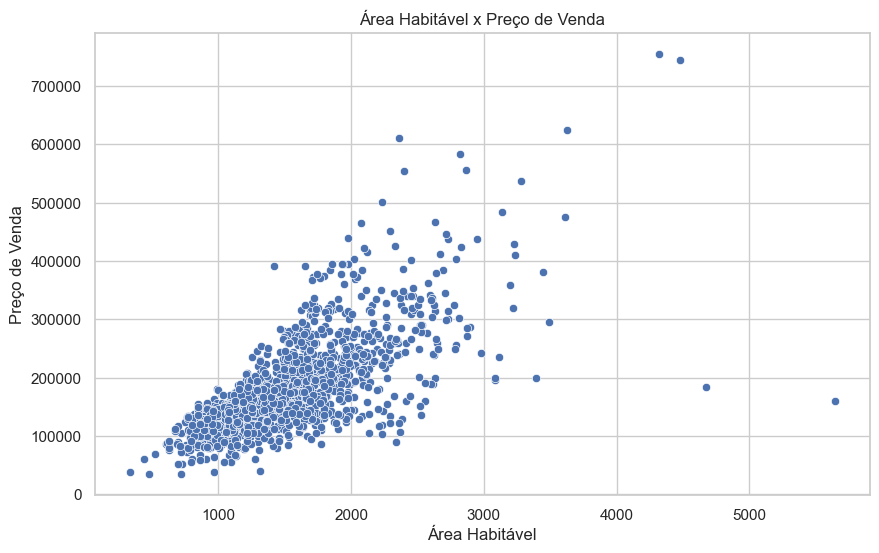

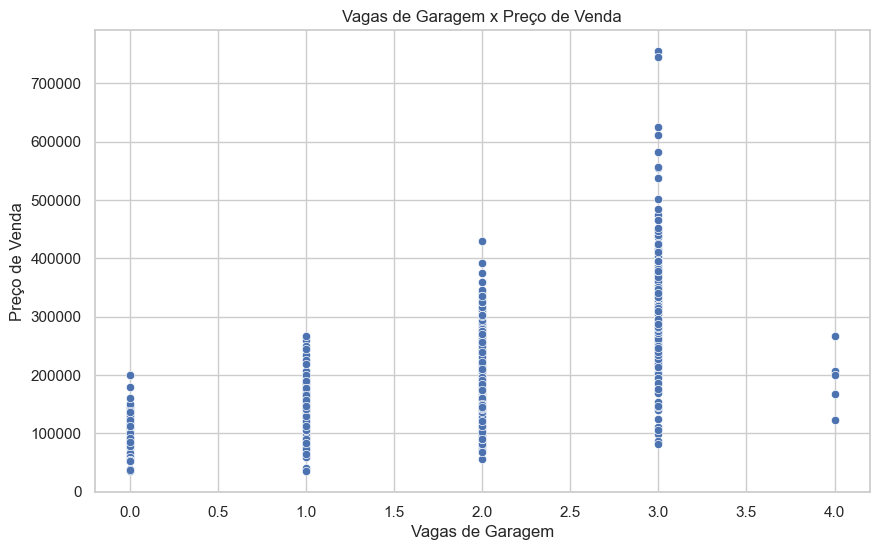

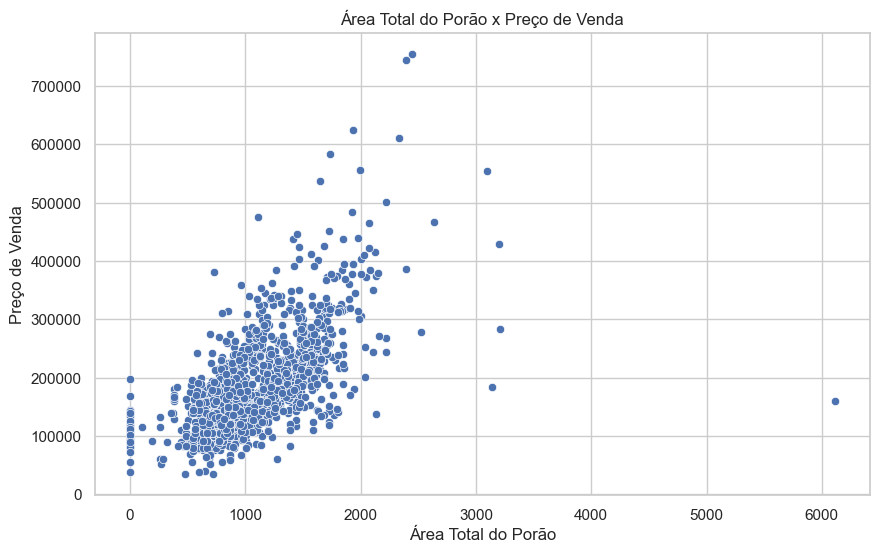

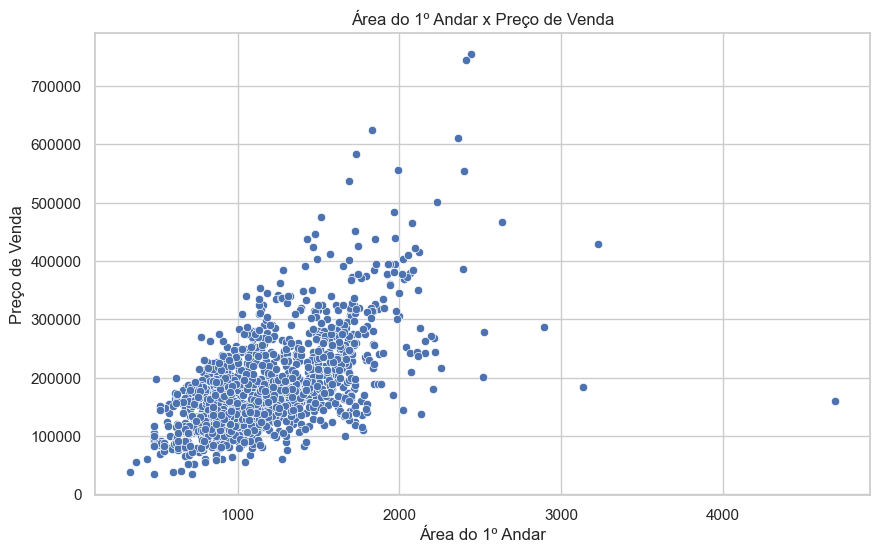

In [39]:
# ### 3.2 Relação entre variáveis mais correlacionadas
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
nomes_traduzidos = {
    'OverallQual': 'Qualidade Geral',
    'GrLivArea': 'Área Habitável',
    'GarageCars': 'Vagas de Garagem',
    'TotalBsmtSF': 'Área Total do Porão',
    '1stFlrSF': 'Área do 1º Andar'
}

for feature in features:
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.xlabel(nomes_traduzidos[feature])
    plt.ylabel("Preço de Venda")
    plt.title(f'{nomes_traduzidos[feature]} x Preço de Venda')
    plt.show()

In [43]:
# ## 4. Limpeza e seleção de dados
X = df[features]
y = df['SalePrice']


In [45]:
# ## 5. Divisão dos dados
treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# ## 6. Modelos de Regressão
modelos = {
    'Regressão Linear': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

resultados = []

for nome, modelo in modelos.items():
    modelo.fit(treino_X, treino_y)
    predicoes = modelo.predict(teste_X)

    mae = mean_absolute_error(teste_y, predicoes)
    rmse = np.sqrt(mean_squared_error(teste_y, predicoes))
    r2 = r2_score(teste_y, predicoes)

    resultados.append({"Modelo": nome, "MAE": mae, "RMSE": rmse, "R²": r2})


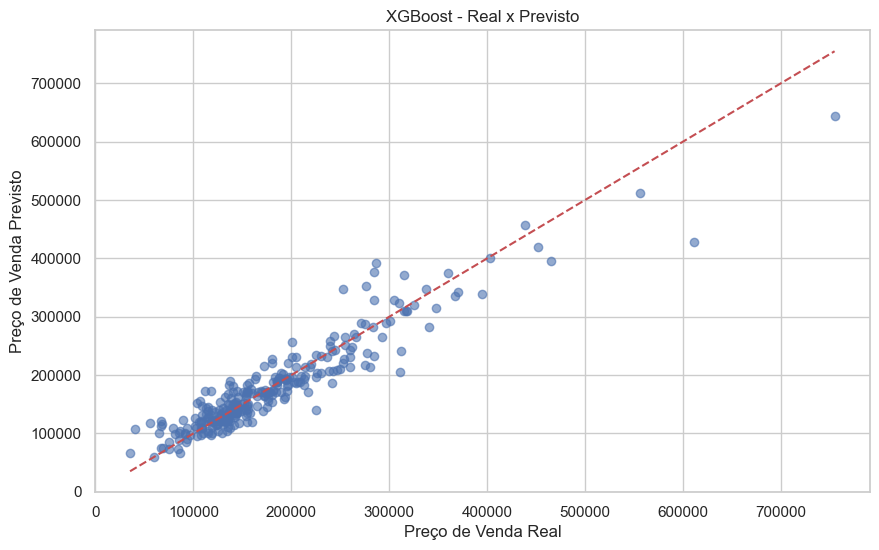

In [59]:
# Visualização das previsões
plt.scatter(teste_y, predicoes, alpha=0.6)
plt.xlabel("Preço de Venda Real")
plt.ylabel("Preço de Venda Previsto")
plt.title(f"{nome} - Real x Previsto")
plt.plot([teste_y.min(), teste_y.max()], [teste_y.min(), teste_y.max()], 'r--')
plt.show()# Exporta resultado para CSV
previsoes_df = pd.DataFrame({"Preco_Real": teste_y.values, "Preco_Previsto": predicoes})
previsoes_df.to_csv(f"previsoes_{nome.replace(' ', '_').lower()}.csv", index=False)

In [66]:
# ## 7. Comparativo entre Modelos
resultado_df = pd.DataFrame(resultados)
print(resultado_df)


             Modelo           MAE          RMSE        R²
0  Regressão Linear  25420.776687  39944.399347  0.791983
1     Random Forest  19993.524931  29605.538515  0.885730
2           XGBoost  20045.656250  29648.797678  0.885396
